In [ ]:
# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Import required libraries

In [ ]:
# /content/drive/MyDrive/Guvi Files/EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [ ]:
# Load Data
# path = "./DataSet/"
path = "/content/drive/MyDrive/Guvi Files/EDA/"
stores = pd.read_csv(path + 'Stores.csv')
products = pd.read_csv(path + 'Products.csv')
exchange_rate = pd.read_csv(path + 'Exchange_Rates.csv')
customers = pd.read_csv(path + 'Customers.csv')
sales = pd.read_csv(path + 'Sales.csv')

# Stores
## Step 1: Clean, Fill Missing Data and Normalise if needed
### Stores
- Check for missing data
- Fill if needed

In [ ]:
stores.isnull().sum()

,0
StoreKey,0
Country,0
State,0
Square Meters,1
Open Date,0


## There's one store without the area. Check the data and fill if needed


In [ ]:
# check which store has null
stores[stores['Square Meters'].isnull()]
# stores.fillna(stores["Square Meters"].mean(),inplace=True)

,StoreKey,Country,State,Square Meters,Open Date
66,0,Online,Online,NaN,1/1/2010


## It's an online store, we can keep it as is

In [ ]:
stores.describe()

,StoreKey,Square Meters
count,67.000000,66.000000
mean,33.000000,1402.196970
std,19.485037,576.404058
min,0.000000,245.000000
25%,16.500000,1108.750000
50%,33.000000,1347.500000
75%,49.500000,2000.000000
max,66.000000,2105.000000


# Products
### Units cost & price is prefixed with  \$ symbol and keep the cost & price as float for easy calculations

In [ ]:
products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [ ]:
products.isna().sum()

,0
ProductKey,0
Product Name,0
Brand,0
Color,0
Unit Cost USD,0
Unit Price USD,0
SubcategoryKey,0
Subcategory,0
CategoryKey,0
Category,0


In [ ]:
# Remove $ & spaces from Products Unit Cost  & Price, covert as float and create a new col in dataframe
products['Unit Cost'] = products['Unit Cost USD'].str.replace('[$, ]', '', regex=True).astype(float)
products['Unit Price'] = products['Unit Price USD'].str.replace('[$, ]', '', regex=True).astype(float)

In [ ]:
products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Unit Cost,Unit Price
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio,6.62,12.99
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio,6.62,12.99
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio,7.40,14.52
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio,11.00,21.57
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio,11.00,21.57


In [ ]:
products.describe()

,ProductKey,SubcategoryKey,CategoryKey,Unit Cost,Unit Price
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,1259.000000,491.810091,4.878824,147.655562,356.830131
std,726.739637,229.887134,2.299170,184.373683,494.054962
min,1.000000,101.000000,1.000000,0.480000,0.950000
25%,630.000000,305.000000,3.000000,32.250000,69.000000
50%,1259.000000,406.000000,4.000000,86.670000,199.990000
75%,1888.000000,801.000000,8.000000,183.950000,410.000000
max,2517.000000,808.000000,8.000000,1060.220000,3199.990000


In [ ]:
# check for duplicates in products
products.duplicated().sum()

0

In [ ]:
# Check for duplicates in the Product/Brand/Color
# products.groupby(by=['Product Name','Brand','Color'],as_index=False).size().sort_values(by='size',ascending=False)
products[['Product Name','Brand','Color']].duplicated().sum()

0

# Exchange Rate

In [ ]:
#check and clean exchange rate if needed
exchange_rate.head()

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


In [ ]:
exchange_rate.isna().sum()

,0
Date,0
Currency,0
Exchange,0


In [ ]:
exchange_rate.duplicated().sum()

0

In [ ]:
exchange_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


<Axes: xlabel='Date', ylabel='Exchange'>

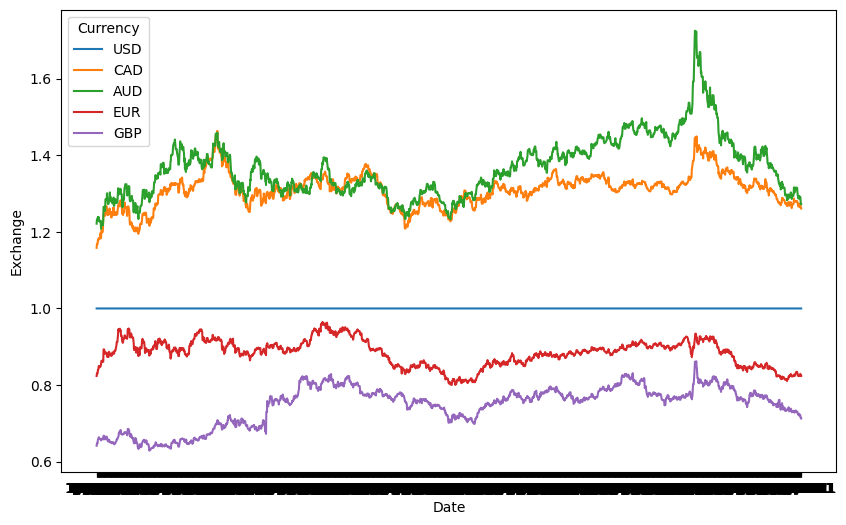

In [ ]:
#plot exchange rate, currency wise over the date
plt.figure(figsize=(10,6))
sns.lineplot(data=exchange_rate,x='Date',y='Exchange',hue='Currency')

<Axes: xlabel='Currency', ylabel='Exchange'>

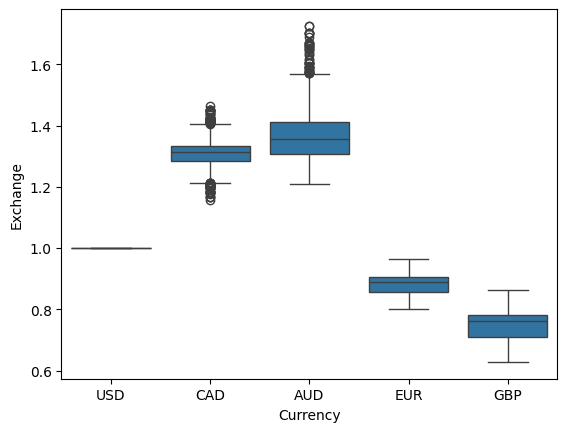

In [ ]:
sns.boxplot(x='Currency', y = 'Exchange', data = exchange_rate)

# Customers

In [ ]:
# Check for missing data in customers
customers.isna().sum()

,0
CustomerKey,0
Gender,0
Name,0
City,0
State Code,10
State,0
Zip Code,0
Country,0
Continent,0
Birthday,0


## State code is missing for 10 Customers. It's ok to keep/drop, we can use State instead

In [ ]:
customers.describe()

,CustomerKey
count,1.526600e+04
mean,1.060508e+06
std,6.127097e+05
min,3.010000e+02
25%,5.140335e+05
50%,1.079244e+06
75%,1.593980e+06
max,2.099937e+06


In [ ]:
customers.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [ ]:
customers.duplicated().sum()

0

In [ ]:
customers.groupby(by=['Gender'],as_index=False).size()

,Gender,size
0,Female,7518
1,Male,7748


## Calculate age of the customers from DOB

In [ ]:
from datetime import datetime,date

def calculate_age(born):
    today = date.today()
    born = datetime.strptime(born, "%m/%d/%Y").date()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

customers["age"] = customers["Birthday"].apply(calculate_age)

In [ ]:
customers.describe()

,CustomerKey,age
count,1.526600e+04,15266.000000
mean,1.060508e+06,55.384515
std,6.127097e+05,19.322306
min,3.010000e+02,22.000000
25%,5.140335e+05,39.000000
50%,1.079244e+06,56.000000
75%,1.593980e+06,72.000000
max,2.099937e+06,89.000000


In [ ]:
customers.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,age
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939,85
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979,44
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947,77
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957,66
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965,58


# Sales

In [ ]:
sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [ ]:
sales.isna().sum()

,0
Order Number,0
Line Item,0
Order Date,0
Delivery Date,49719
CustomerKey,0
StoreKey,0
ProductKey,0
Quantity,0
Currency Code,0


## Delivery date for many of the sales records is missing. We can drop it


In [ ]:
#Drop delivery Date
sales.drop(columns=['Delivery Date'],inplace=True)

In [ ]:
sales.head()

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,266019,0,373,1,CAD


In [ ]:
stores.describe()

,StoreKey,Square Meters
count,67.000000,66.000000
mean,33.000000,1402.196970
std,19.485037,576.404058
min,0.000000,245.000000
25%,16.500000,1108.750000
50%,33.000000,1347.500000
75%,49.500000,2000.000000
max,66.000000,2105.000000


In [ ]:
#check for null values in sales
sales.isna().sum()

,0
Order Number,0
Line Item,0
Order Date,0
CustomerKey,0
StoreKey,0
ProductKey,0
Quantity,0
Currency Code,0


In [ ]:
#count 0 in StoreKey
(sales['StoreKey'] == 0).sum()

13165

## StoreKey is 0 for many rows.. There is a Store in Stores with 0. Make sure 0 is a valid store


In [ ]:
sales_store_0 = (sales['StoreKey'] == 0).sum()
stores_store_0 = (stores['StoreKey'] == 0).sum()
print(f"StoreKey 0 in Sales {sales_store_0}, 0 in stores {stores_store_0}")
stores[(stores['StoreKey'] == 0)]

StoreKey 0 in Sales 13165, 0 in stores 1


,StoreKey,Country,State,Square Meters,Open Date
66,0,Online,Online,NaN,1/1/2010


## StoreKey 0 is for Online purchases, we should keep it

In [ ]:
stores.shape

(67, 5)

In [ ]:
sales.describe()

,Order Number,Line Item,CustomerKey,StoreKey,ProductKey,Quantity
count,6.288400e+04,62884.000000,6.288400e+04,62884.000000,62884.000000,62884.000000
mean,1.430905e+06,2.164207,1.180797e+06,31.802144,1125.859344,3.144790
std,4.532963e+05,1.365170,5.859634e+05,22.978188,709.244010,2.256371
min,3.660000e+05,1.000000,3.010000e+02,0.000000,1.000000,1.000000
25%,1.121017e+06,1.000000,6.808580e+05,8.000000,437.000000,1.000000
50%,1.498016e+06,2.000000,1.261200e+06,37.000000,1358.000000,2.000000
75%,1.788010e+06,3.000000,1.686496e+06,53.000000,1650.000000,4.000000
max,2.243032e+06,7.000000,2.099937e+06,66.000000,2517.000000,10.000000


In [ ]:
sales.shape

(62884, 8)

In [ ]:
#Convert dates to date type
# Stores
# Products
# Exchange Rate
# Customers
# Sales


In [ ]:
#convert Open Date in stores to Date format
stores['Open Date'] = pd.to_datetime(stores['Open Date'])

In [ ]:
#convert Date in exchange to date format
exchange_rate['Date'] = pd.to_datetime(exchange_rate['Date'])

In [ ]:
#Birthday in customers to date format
customers['Birthday'] = pd.to_datetime(customers['Birthday'])

In [ ]:
#Order date in Sales to date format
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

# Insert cleaned data into DB without merging as a backup

In [ ]:
# sql statement to create table from dataframe with postgresql
from sqlalchemy import create_engine
from google.colab import userdata
engine = create_engine(userdata.get('db_connection'))

In [ ]:
stores.to_sql('stores', engine, if_exists='replace', index=False)
products.to_sql('products', engine, if_exists='replace', index=False)
exchange_rate.to_sql('exchange_rate', engine, if_exists='replace', index=False)
customers.to_sql('customers', engine, if_exists='replace', index=False)
sales.to_sql('sales', engine, if_exists='replace', index=False)

884

# Merge dataset to a single dataframe with required cols

### 1. Drop unwanted cols
- products: Unit Cost USD, Unit Price USD
- customers: Name, State Code





In [ ]:
#Drop ProductKey,Unit Cost USD, Unit Price USD from products
products.drop(columns=['Unit Cost USD','Unit Price USD'],inplace=True)

#Drop Name, State Code from customers
customers.drop(columns=['Name','State Code'],inplace=True)

### 2. Merge Sales & Products based on product key

In [ ]:
#empty dataframe
merged_data = pd.DataFrame()
# rename products column names to easily identify in the merged dataset
products = products.add_prefix('Product_')
# merge sales and products based on productkey and products, suffix _products
merged_data = pd.merge(sales, products, left_on='ProductKey', right_on='Product_ProductKey', how='left')


### 3. Merge customers

In [ ]:
# add prefix to customer cols
customers = customers.add_prefix('Cust_')
#merge merged_data and customers on customerkey, suffix _customer
merged_data = pd.merge(merged_data, customers, left_on='CustomerKey', right_on='Cust_CustomerKey', how='left')

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order Number            62884 non-null  int64         
 1   Line Item               62884 non-null  int64         
 2   Order Date              62884 non-null  datetime64[ns]
 3   CustomerKey             62884 non-null  int64         
 4   StoreKey                62884 non-null  int64         
 5   ProductKey              62884 non-null  int64         
 6   Quantity                62884 non-null  int64         
 7   Currency Code           62884 non-null  object        
 8   Product_ProductKey      62884 non-null  int64         
 9   Product_Product Name    62884 non-null  object        
 10  Product_Brand           62884 non-null  object        
 11  Product_Color           62884 non-null  object        
 12  Product_SubcategoryKey  62884 non-null  int64 

### 4. Merge exchage rates

In [ ]:
# prefix ex_ to exchange_rate
exchange_rate = exchange_rate.add_prefix('ex_')

#merge merged_data and exchange_rate on Order Date & Date, Currency Code & Currency, suffix _exchange
merged_data = pd.merge(merged_data, exchange_rate, left_on=['Order Date', 'Currency Code'], right_on=['ex_Date', 'ex_Currency'], how='left')

### 5. Merge stores

In [ ]:
# prefix store_ to stores
stores = stores.add_prefix('store_')
#merge merged_data and stores on StoreKey, suffix _store
merged_data = pd.merge(merged_data, stores, left_on='StoreKey', right_on='store_StoreKey', how='left')

### 6. Drop duplicate key columns

In [ ]:
# drop duplicated keys
merged_data.drop(columns=['Cust_CustomerKey','Product_ProductKey','ex_Date','ex_Currency','store_StoreKey'],inplace=True)

### 7. Change col names to db friendly names (remove spaces, use _, lower case...)

In [ ]:
# change col names to db friendly names.convert to smallcase, replace space with underscore
merged_data.columns = merged_data.columns.str.lower().str.replace(' ', '_')


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_number            62884 non-null  int64         
 1   line_item               62884 non-null  int64         
 2   order_date              62884 non-null  datetime64[ns]
 3   customerkey             62884 non-null  int64         
 4   storekey                62884 non-null  int64         
 5   productkey              62884 non-null  int64         
 6   quantity                62884 non-null  int64         
 7   currency_code           62884 non-null  object        
 8   product_product_name    62884 non-null  object        
 9   product_brand           62884 non-null  object        
 10  product_color           62884 non-null  object        
 11  product_subcategorykey  62884 non-null  int64         
 12  product_subcategory     62884 non-null  object

### 8. Calculate cost, price, P&L in USD as well as after applying exchange rates

In [ ]:
# Calculate line item wise profit/loss
# Calculate product cost in usd
merged_data['total_cost_usd'] = merged_data['quantity'] * merged_data['product_unit_cost']
# calculate total_price_usd
merged_data['total_price_usd'] = merged_data['quantity'] * merged_data['product_unit_price']
# calculate profit/loss
merged_data['profit_loss_usd'] = merged_data['total_price_usd'] - merged_data['total_cost_usd']
# calculate total_cost_org by applying exchange rate
merged_data['total_cost_org'] = merged_data['total_cost_usd'] * merged_data['ex_exchange']
# calculate total_price_org by applying exchange rate
merged_data['total_price_org'] = merged_data['total_price_usd'] * merged_data['ex_exchange']
# calculate profit/loss
merged_data['profit_loss_org'] = merged_data['total_price_org'] - merged_data['total_cost_org']



### 9. Calculate age group of customers

In [ ]:
# Calculate age group of the customers based on their age
merged_data['cust_age_group'] = pd.cut(merged_data['cust_age'], bins=[0, 20, 40, 60 ,80, 100], labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

In [ ]:
#print cust_age and cust_age_group
merged_data[['cust_age','cust_age_group']].head()


,cust_age,cust_age_group
0,53,40-60
1,28,20-40
2,28,20-40
3,61,60-80
4,61,60-80


### 10.Insert merged data into DB

In [ ]:
# Insert merged_data into db
merged_data.to_sql('merged_data', engine, if_exists='replace', index=False)

191

In [ ]:
sales.shape

(62884, 8)

In [ ]:
merged_data.shape

(62884, 37)

In [ ]:
### 10. Dashboard using Power BI